In [1]:
import numpy as np
import feather
import pandas
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm

## Model 1 : $\{ \mu_t \}$ Constant

In [3]:
# reading infomation matrix data : info_matrix
data_ifm_const_mu = feather.read_dataframe("stab_range_info_const_mu.feather")

# reading GR_matrix
data_grm_const_mu = feather.read_dataframe("stab_range_GR_const_mu.feather")

# reading grid points data : ρ_σ_grid, δ_σ_grid
data_grid = feather.read_dataframe("stab_range_grid_const_mu.feather")
ρ_σ_grid, δ_σ_grid = data_grid.ρ_σ_grid, data_grid.δ_σ_grid

In [4]:
row, col = np.shape(data_ifm_const_mu)  # shape of the information matrix
info_matrix = np.empty((row, col))  # create empty space to store infomation matrix

# fill in the infomation matrix
for i in range(col):
    info_matrix[:, i] = data_ifm_const_mu.iloc[:, i]

# finding the threshold of stability range 
idx = np.sum(info_matrix, axis=1) + 1  # finding threshold index on the δ_σ grid points
δ_thresh = δ_σ_grid[idx]  # finding threshold δ_σ values 

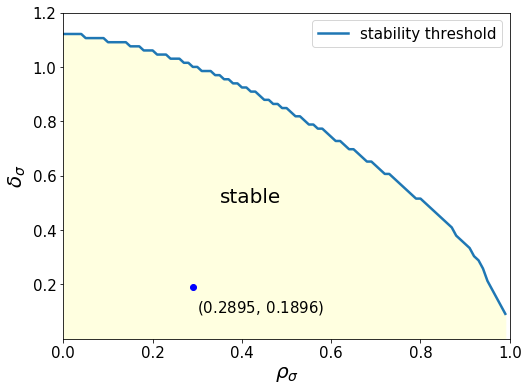

In [5]:
# Plot the stability range
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(ρ_σ_grid, δ_thresh, label='stability threshold', lw=2.5)

ax.set_xlabel(r'$\rho_\sigma$', size=20)
ax.set_ylabel(r'$\delta_\sigma$', size=20)
ax.set_xlim((0.0, 1.0))
ax.set_ylim((0.0, 1.2))
#ax.set_title('Model 1: γ=%i' %γ, size=20)
plt.xticks(fontsize=15)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0, 1.2], fontsize=15)

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

ax.text(0.35, 0.5, 'stable', fontdict=font)
#ax.text(0.55, 1.0, 'unstable', fontdict=font)

ax.plot([0.2895], [0.1896], marker='o', markersize=6, color="blue")
ax.text(0.3, 0.1, "$(0.2895, \, 0.1896)$", family="sans-serif", size=15)

ax.fill_between(ρ_σ_grid, δ_thresh, color='lightyellow')

ax.legend(fontsize=15)

plt.savefig('stb_cons_mu.png')

plt.show()

C:\Users\Public\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater


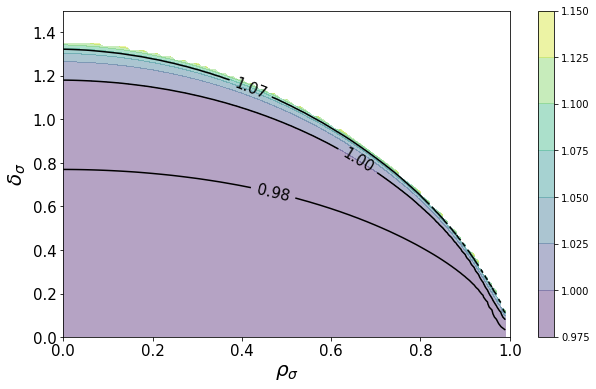

In [6]:
β = 0.95    # discount factor

# create empty space to store GR_matrix
row, col = np.shape(data_grm_const_mu)
GR_matrix = np.empty((row, col))        

# fill in GR_matrix
for i in range(col):
    GR_matrix[:, i] = data_grm_const_mu.iloc[:, i]

# create contour plot for G_R
fig, ax = plt.subplots(figsize=(10,6))

X1, Y1 = np.meshgrid(ρ_σ_grid, δ_σ_grid)

# hide high values in GR_matrix 
Z1 = GR_matrix
Z1[Z1 > 1.2] = np.nan

CS1_f = ax.contourf(X1, Y1, β*Z1.T, alpha=0.4)
plt.colorbar(CS1_f, ax=ax)

levels=[0.980, 1.00, 1.07]

CS1 = ax.contour(X1, Y1, β*Z1.T, colors='k', 
                 levels=levels)
ax.clabel(CS1, inline=1, fontsize=15, fmt="%1.2f")

ax.set_xlabel("$\\rho_\sigma$", fontsize=20)
ax.set_ylabel("$\delta_\sigma$", fontsize=20)

plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0], fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('G_R_cons_mu.png')

plt.show()

## Model 2 : $\{\sigma_t\}$ constant

In [7]:
# reading infomation matrix data : info_matrix
data_ifm_const_var = feather.read_dataframe("stab_range_info_const_var.feather")

# reading GR_matrix
data_grm_const_var = feather.read_dataframe("stab_range_GR_const_var.feather")

# reading grid points data : ρ_σ_grid, δ_σ_grid
data_grid = feather.read_dataframe("stab_range_grid_const_var.feather")
ρ_μ_grid, δ_μ_grid = data_grid.ρ_μ_grid, data_grid.δ_μ_grid

In [8]:
row, col = np.shape(data_ifm_const_var)  # shape of the information matrix
info_matrix_2 = np.empty((row, col))  # create empty space to store infomation matrix

# fill in the infomation matrix
for i in range(col):
    info_matrix_2[:, i] = data_ifm_const_var.iloc[:, i]

# finding the threshold of stability range 
idx = np.sum(info_matrix_2, axis=1) + 1  # finding threshold index on the δ_σ grid points
δ_μ_thresh = δ_μ_grid[idx]  # finding threshold δ_σ values 

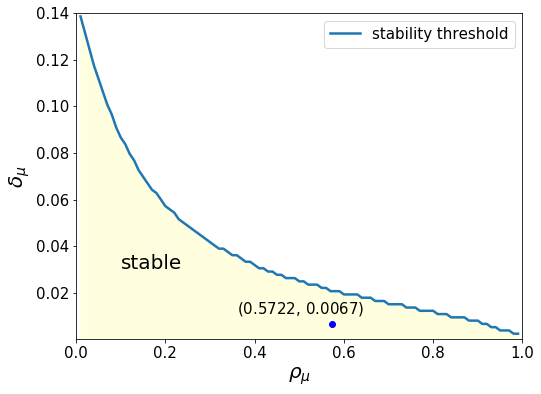

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(ρ_μ_grid, δ_μ_thresh, label='stability threshold', lw=2.5)

ax.set_xlabel(r'$\rho_\mu$', size=20)
ax.set_ylabel(r'$\delta_\mu$', size=20)
ax.set_xlim((0.0, 1.0))
ax.set_ylim((0.0, 0.14))
#ax.set_title('Model 2: γ=%i' %γ, size=15)
plt.xticks(fontsize=15)
plt.yticks([0.02,0.04,0.06,0.08,0.10,0.12,0.14], fontsize=15)


font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

ax.text(0.1, 0.03, 'stable', fontdict=font)
#ax.text(0.3, 0.05, 'unstable', fontdict=font)

ax.plot([0.5722], [0.0067], marker='o', markersize=6, color="blue")
ax.text(0.36, 0.011, "$(0.5722, \, 0.0067)$", family="sans-serif", size=15)

ax.fill_between(ρ_μ_grid, δ_μ_thresh, color='lightyellow')

ax.legend(fontsize=15)

plt.savefig('stb_cons_var.png')

plt.show()

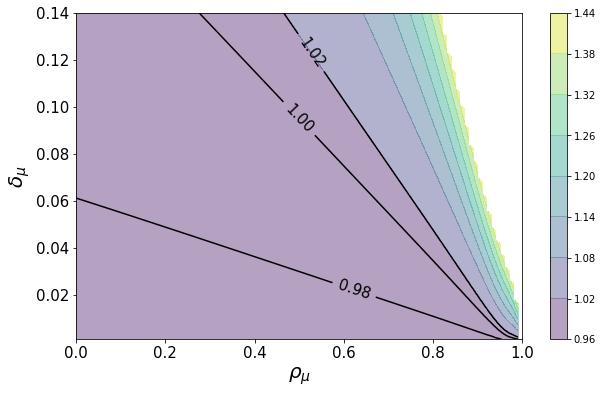

In [10]:
β = 0.95    # discount factor

# create empty space to store GR_matrix
row, col = np.shape(data_grm_const_var)
GR_matrix_2 = np.empty((row, col))        

# fill in GR_matrix
for i in range(col):
    GR_matrix_2[:, i] = data_grm_const_var.iloc[:, i]

    
# ------------------------------------- #
#     make contour plot of G_β
# ------------------------------------- #
fig, ax = plt.subplots(figsize=(10,6))

X2, Y2 = np.meshgrid(ρ_μ_grid, δ_μ_grid)

# hide high values in Gβ_matrix 
Z2 = GR_matrix_2
Z2[Z2 > 1.5] = np.nan

CS2_f = ax.contourf(X2, Y2, β*Z2.T, alpha=0.4)
plt.colorbar(CS2_f, ax=ax)

levels = [0.98, 1.0, 1.02]

CS2 = ax.contour(X2, Y2, β*Z2.T, colors='k', 
                 levels=levels)

ax.clabel(CS2, inline=1, fontsize=15, fmt="%1.2f")

ax.set_xlabel("$\\rho_\mu$", fontsize=20)
ax.set_ylabel("$\delta_\mu$", fontsize=20)

plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0], fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('G_R_cons_var.png')

plt.show()

## Random Discounting
- $\log \beta_{t+1} = (1 - \rho) \mu + \rho \log \beta_t + \epsilon_{t+1}$, $\{\epsilon_t \} \sim iid N(0, \sigma^2)$

- $\mu = -0.0836$, $\rho = 0.992$, $\sigma = 0.0021$

In [11]:
# reading Gβ_matrix
data_gbm = feather.read_dataframe("Gβ_matrix.feather")

# reading grid points data : ρ_grid, σ_grid
ρ_grid = feather.read_dataframe("rho_grid.feather")
σ_grid = feather.read_dataframe("sig_grid.feather")

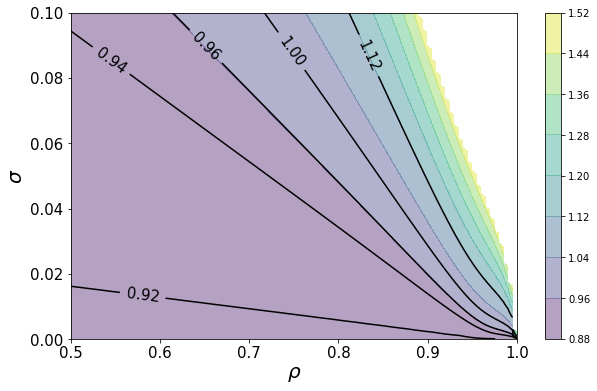

In [12]:
# create empty space to store GR_matrix
row, col = np.shape(data_gbm)
Gβ_matrix = np.empty((row, col))    

# fill in Gβ_matrix
for i in range(col):
    Gβ_matrix[:, i] = data_gbm.iloc[:, i]


# ------------------------------------- #
#     make contour plot of G_β
# ------------------------------------- #
fig, ax = plt.subplots(figsize=(10,6))

Xβ, Yβ = np.meshgrid(ρ_grid, σ_grid)

# hide high values in Gβ_matrix 
Zβ = Gβ_matrix
Zβ[Zβ > 1.5] = np.nan

CSβ_f=ax.contourf(Xβ, Yβ, Zβ.T, alpha=0.4)
plt.colorbar(CSβ_f, ax=ax)

levels=[0.9204, 0.9404,  0.9604, 1.0004, 1.1204]

CSβ = ax.contour(Xβ, Yβ, Gβ_matrix.T, colors='k', 
                 levels=levels)

ax.clabel(CSβ, inline=1, fontsize=15, fmt="%1.2f")

ax.set_xlabel("$\\rho$", fontsize=20)
ax.set_ylabel("$\sigma$", fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('G_beta.png')
plt.show()